In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import math
import altair as alt
import pandas as pd

In [4]:
#input first clustered result
totalfeeders = pd.read_csv('Feeders2.csv')
# confeeders = totalfeeders.loc[totalfeeders['ID'].between(33,50)]

In [5]:
# plot and assign ID for later calculation
alt.Chart(totalfeeders).mark_point(filled = True).encode(
    alt.X('lon:Q',scale=alt.Scale(zero=False)),
    alt.Y('lat:Q',scale=alt.Scale(zero=False)),
    alt.Color('Type:N'),
    alt.OpacityValue(0.7),
    tooltip = [
        alt.Tooltip('ID:N'),
        alt.Tooltip('Type:N'),
        alt.Tooltip('Size:Q'),
        alt.Tooltip('lon:Q'),
        alt.Tooltip('lat:Q')
    ]   
).properties(
    width = 500
).interactive()

# alt.Chart(confeeders).mark_point(filled = True).encode(
#     alt.X('lon:Q',scale=alt.Scale(zero=False)),
#     alt.Y('lat:Q',scale=alt.Scale(zero=False)),
#     alt.Color('Area:N'),
#     alt.OpacityValue(0.5),
#     tooltip = [
#         alt.Tooltip('ID:N'),
#         alt.Tooltip('Area:N'),
#         alt.Tooltip('number:Q')
#     ]   
# ).properties(
#     width = 500
# )

alt.Chart(...)

In [27]:
# points from clustesing at the botton
# cluster = [25,34,21] #1
# cluster = [53,36,22,29] #2
# cluster = [23,37,32,26] #3
# cluster = [19,16,17,48,20,18]#4
# cluster = [15,11,12,13,30] #5
# cluster = [35,14] #6
# cluster = [9,49,6,8,24] #7
# cluster = [50,31] #8
# cluster = [47,46,51,52,7] #9
# cluster = [33,27,28,38,10] #load #10
# cluster = [43,5,41] #11
# cluster = [1,42,2,39,40,3] #12
cluster = [44,4,45] #13
res = 0
ind = 0
con = 0
substationcentroid = totalfeeders.loc[totalfeeders['ID'].isin(cluster)]
print(substationcentroid)
avg_lon = substationcentroid['lon'].mean()
avg_lat = substationcentroid['lat'].mean()
for i in cluster:
    specificfeeder = substationcentroid.loc[substationcentroid['ID'] == i]
    number = specificfeeder['Size']
    print(number.values)
    if i in range(1,9):
        res+= number.values[0]
    elif i in range(10,32):
        ind+= number.values[0]
    else: 
        con+= number.values[0]
print(avg_lon,avg_lat,res,con,ind)
#pmax calculation
# peak p
# 1.149 -r
# 6.609 -c
# 124.485 -i
total_load13 = (res*1.149+con*6.609+ind*124.485)*1.25/1000 #p(gen)*1.25/1000=p(max)[mw]
#plug in ML
print(total_load13)

    ID Type  Size         lon        lat
3    4  com  1126 -146.614828  64.469849
43  44  ind    50 -147.633027  64.833370
44  45  ind    46 -145.740999  63.672295
[50]
[1126]
[46]
-146.6629514 64.32517111666667 1126 96 0
2.4102975


In [30]:
#put all in list
load_all = [total_load1,total_load2,total_load3,total_load4,total_load5,total_load6,total_load7,total_load8,total_load9,total_load10,total_load11,total_load12,total_load13]

In [31]:
print(load_all)

[242.4730125, 252.2585625, 191.59519874999998, 1005.510375, 789.857325, 150.32932874999997, 94.08064875, 80.43121875, 256.1361075, 224.18989875, 1.5898762499999999, 7.507796250000001, 2.4102975]


In [17]:
import scipy as sp
from scipy.spatial import Delaunay
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import matplotlib.pyplot as plt


In [18]:
centerload = np.array([[60.53969488,-150.7072874],[61.0434176, -149.9413172],[61.15084859,-149.8513205],
                  [61.2214074,-149.8850811],[61.53136164,-149.3360126]])
#gveaload = np.array([[64.04115333,-148.7503333],[64.45908794,-147.5852061],[64.76701947,-147.7124522]])
#generators = np.array([[61.409679743705496],[-149.45482163082002]])
#allpoints = np.concatenate((points,generators))

                          
tri = Delaunay(centerload)


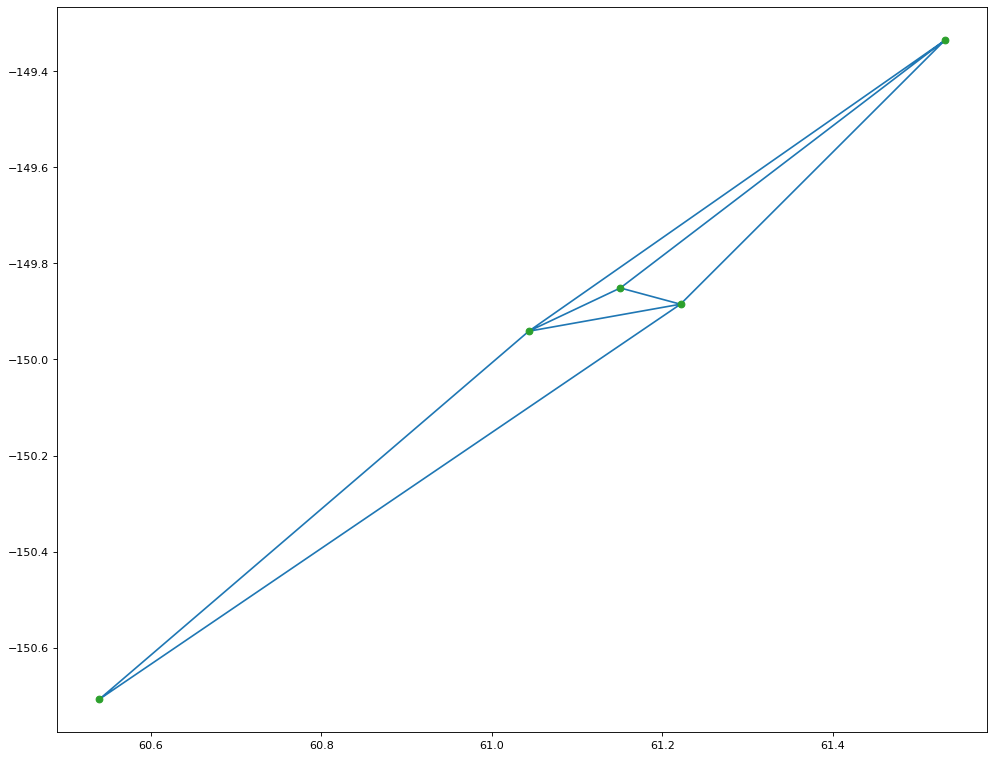

In [19]:
plt.figure(figsize=(15, 12), dpi=80)
plt.triplot(centerload[:,0], centerload[:,1], tri.simplices)
plt.plot(centerload[:,0], centerload[:,1], 'o')
#plt.plot(generators[:,0],generators[:,1], "x")
plt.show()

In [21]:
vertex = tri.simplices
vertex

array([[3, 1, 0],
       [1, 2, 4],
       [2, 3, 4],
       [3, 2, 1]], dtype=int32)

In [32]:
edge = centerload[vertex]

print(edge[1][0],edge[1][1])
print(len(edge))

[  61.0434176 -149.9413172] [  61.15084859 -149.8513205 ]
4


In [36]:
import geopy.distance

# input: dot1 (x1, y1), dot2 (x2, y2)
# output: distance
    

for i in range(len(edge)):
    v1 = edge[i][0]
    V1 = vertex[i][0]
    v2 = edge[i][1]
    V2 = vertex[i][1]
    v3 = edge[i][2]
    V3 = vertex[i][2]
    dist1 = geopy.distance.geodesic(v1,v2)
    dist2 = geopy.distance.geodesic(v1,v3)
    dist3 = geopy.distance.geodesic(v2,v3)
    print([V1,V2,dist1],[V1,V3,dist2],[V2,V3,dist3])
 
    
    

[3, 1, Distance(20.063765541475508)] [3, 0, Distance(88.11274912931107)] [1, 0, Distance(69.93137442347911)]
[1, 2, Distance(12.918002486322882)] [1, 4, Distance(63.32249892432865)] [2, 4, Distance(50.583820679330024)]
[2, 3, Distance(8.069519083144419)] [2, 4, Distance(50.583820679330024)] [3, 4, Distance(45.32968125977829)]
[3, 2, Distance(8.069519083144419)] [3, 1, Distance(20.063765541475508)] [2, 1, Distance(12.918002486322882)]


In [154]:
tri.vertex_neighbor_vertices

(array([ 0,  4,  7, 11, 17, 20, 23, 26], dtype=int32),
 array([3, 4, 6, 2, 3, 5, 2, 6, 0, 3, 1, 4, 0, 5, 6, 2, 1, 3, 0, 5, 4, 3,
        1, 3, 0, 2], dtype=int32))

In [155]:
tri.neighbors[0]

array([-1,  2,  1], dtype=int32)

In [156]:
points[tri.simplices]

array([[[  64.66468495, -148.12177162],
        [  64.74112577, -147.40545178],
        [  64.264457  , -147.87889736]],

       [[  64.74112577, -147.40545178],
        [  64.66468495, -148.12177162],
        [  64.7796533 , -149.67626343]],

       [[  64.49101066, -148.16925467],
        [  64.66468495, -148.12177162],
        [  64.264457  , -147.87889736]],

       [[  64.36372725, -148.64701337],
        [  64.49101066, -148.16925467],
        [  64.264457  , -147.87889736]],

       [[  64.49101066, -148.16925467],
        [  64.36372725, -148.64701337],
        [  64.66468495, -148.12177162]],

       [[  64.66468495, -148.12177162],
        [  64.48631125, -149.12454982],
        [  64.7796533 , -149.67626343]],

       [[  64.36372725, -148.64701337],
        [  64.48631125, -149.12454982],
        [  64.66468495, -148.12177162]]])

In [2]:
P = [3,1]
Q = [2,4]
distance = math.dist(P,Q)
print(distance)

3.1622776601683795


In [ ]:
### hierarchical clustering using agglomerative

In [52]:
from sklearn.cluster import AgglomerativeClustering
x=np.zeros((np.size(totalfeeders['lon']),2))
for i in range(np.size(totalfeeders['lon'])):
    x[i][0] = totalfeeders['lon'][i]
    x[i][1] = totalfeeders['lat'][i]
# clustering = AgglomerativeClustering().fit(x)
# clustering.labels_
cluster = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='ward')  
cluster.fit_predict(x)
cluster.labels_

array([ 9,  9,  9,  8,  5,  1,  4,  1, 11,  4,  2,  2,  2,  1,  2,  2,  2,
        2,  2,  2,  0, 10, 13,  1,  7,  2,  4,  4, 10,  6,  4,  2,  4,  0,
        1,  0,  2,  4,  9,  9,  5,  9, 12,  9,  3,  4,  4,  2,  1,  4,  4,
        4,  0])

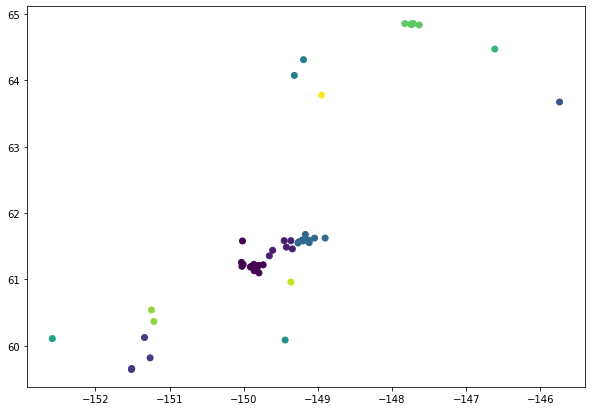

In [51]:
plt.figure(figsize=(10, 7))  
plt.scatter(totalfeeders['lon'], totalfeeders['lat'], c=cluster.labels_) 